В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

medical_df = pd.read_csv('drive/MyDrive/Colab Notebooks/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


**Лінійна регресія**

In [4]:
x = np.array(non_smoker_df["age"])
y = np.array(non_smoker_df["charges"])

In [5]:
def method_normal_squares(x,y):
    theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return theta

In [6]:
X = np.column_stack((np.ones(len(x)), x))

In [58]:
X

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [7]:
MNK_coefs = method_normal_squares(X, y)

In [8]:
MNK_coefs

array([-2091.42055657,   267.24891283])

In [9]:
y_pred = np.dot(X, MNK_coefs)  # Масив прогнозованих значень
print(y_pred[:5])  # Перевіряємо перші 5 прогнозів


[2719.0598744  5391.54900271 6727.79356686 6460.54465403 6193.2957412 ]


In [10]:
print(y[:5])  # Реальні значення
print(y_pred[:5])  # Прогнозовані значення


[ 1725.5523   4449.462   21984.47061  3866.8552   3756.6216 ]
[2719.0598744  5391.54900271 6727.79356686 6460.54465403 6193.2957412 ]


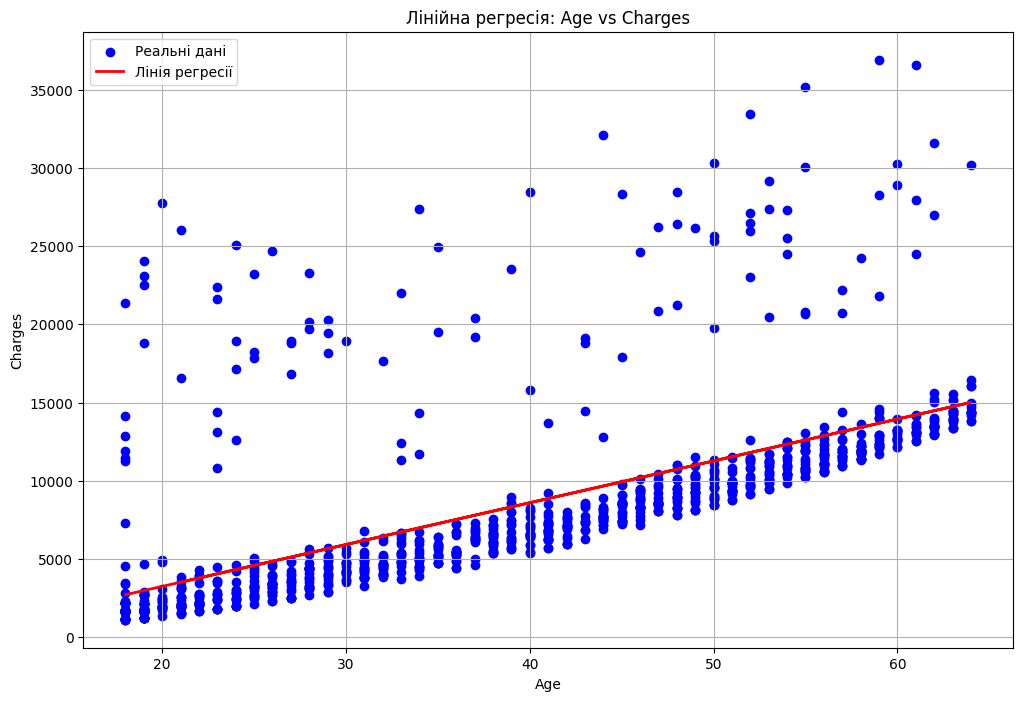

In [11]:
plt.figure(figsize=(12, 8))

plt.scatter(x, y, label="Реальні дані", color="blue", alpha=1.0)

plt.plot(x, y_pred, color="red", label="Лінія регресії", linewidth=2)

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Лінійна регресія: Age vs Charges")
plt.legend()
plt.grid(True)

plt.show()


In [12]:
SS_res = np.sum((y - y_pred) ** 2)
SS_tot = np.sum((y - np.mean(y)) ** 2)
R2 = 1 - (SS_res / SS_tot)

print("R²:", R2)

R²: 0.3943171632425906


In [13]:
rmse = np.sqrt(np.mean((y - y_pred) ** 2))

mae = np.mean(np.abs(y - y_pred))

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52


In [14]:
np.mean(y), np.std(y), np.min(y)

(np.float64(8434.268297856204),
 np.float64(5990.9645302876115),
 np.float64(1121.8739))

**Спостереження**\
Порівнявши метрики середньоквадратичних помилок та значення:\
середнє значення у, стандартне відхилення у, мінімальне значення у а також коефіцієнт детермінації можна сказати, що є велике середнє відхилення прогнозу від реальних значень charges.\
age пояснює лише малу частину варіації charges.


**Full-Batch Градієнтний спуск**

In [15]:
def full_batch_gradient_descent(X, y, lr, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []  # Список для MSE

    for _ in range(epochs):
        y_pred = m * X[:, 1] + b  # Використовуємо X[:, 1] для оновлення параметрів
        error = y_pred - y
        errors.append(np.mean(error**2))  # Зберігаємо MSE у кожній ітерації

        m_gradient = (2/n) * np.dot(error, X[:, 1])  # Оновлення градієнта m (2-й стовпець)
        b_gradient = (2/n) * np.sum(error)  # Оновлення градієнта b

        m -= lr * m_gradient
        b -= lr * b_gradient

    return m, b, errors


In [16]:
m, b, errors = full_batch_gradient_descent(X, y, lr=0.1, epochs=1000)
predictions_fbgd = m * X[:, 1] + b  # Використовуємо X[:, 1] для прогнозів

print(f"m: {m:.2f}, b: {b:.2f}")

m: nan, b: nan


<ipython-input-15-511445590>:9: RuntimeWarning: overflow encountered in square
  errors.append(np.mean(error**2))  # Зберігаємо MSE у кожній ітерації
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-15-511445590>:14: RuntimeWarning: invalid value encountered in scalar subtract
  m -= lr * m_gradient


In [17]:
m1, b1, errors1 = full_batch_gradient_descent(X, y, lr=0.00001, epochs=1000)
m1, b1

(np.float64(220.15455551129122), np.float64(0.2130065279986346))

In [18]:
m2, b2, errors2 = full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000)
m2, b2

(np.float64(221.1045843794301), np.float64(-41.98126853149977))

In [25]:
m3, b3, errors3 = full_batch_gradient_descent(X, y, lr=0.000001, epochs=1000)
m3, b3

(np.float64(213.45756906581036), np.float64(4.331249162394349))

In [26]:
y_pred_0001 = m2 * X[:, 1] + b2
y_pred_00001 = m1 * X[:, 1] + b1
y_pred_000001 = m3 * X[:, 1] + b3

In [27]:
y_pred_0001, y_pred_00001, y_pred_000001

(array([3937.9012503 , 6148.94709409, 7254.47001599, ..., 3937.9012503 ,
        3937.9012503 , 4601.21500344]),
 array([3962.99500573, 6164.54056084, 7265.3133384 , ..., 3962.99500573,
        3962.99500573, 4623.45867227]),
 array([3846.56749235, 5981.14318301, 7048.43102833, ..., 3846.56749235,
        3846.56749235, 4486.94019954]))

In [28]:
MSE_0001 = np.mean((y - y_pred_0001) ** 2)
MSE_00001 = np.mean((y - y_pred_00001) ** 2)
MSE_000001 = np.mean((y - y_pred_000001) ** 2)

In [29]:
MSE_0001, MSE_00001, MSE_000001

(np.float64(22214731.05641085),
 np.float64(22234523.266030565),
 np.float64(22312847.796586115))

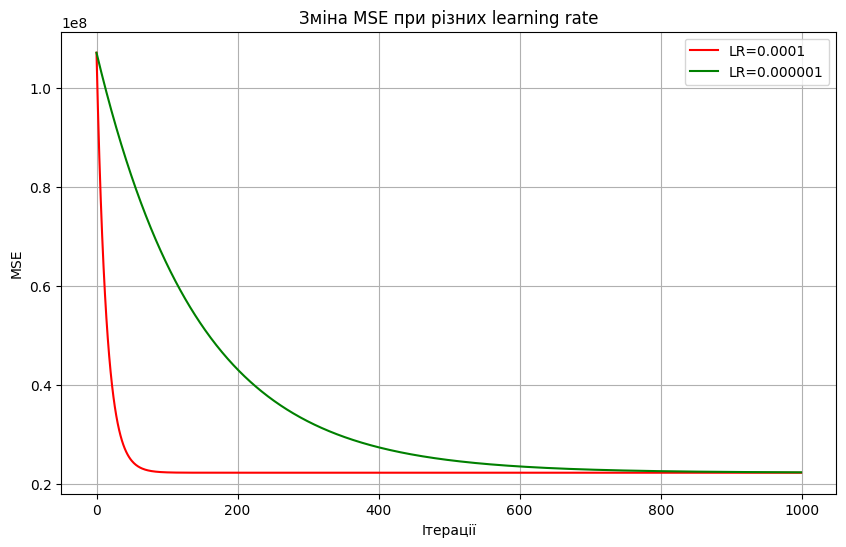

In [32]:

plt.figure(figsize=(10, 6))
plt.plot(errors1, label="LR=0.0001", color="red")
##plt.plot(errors2, label="LR=0.00001", color="blue")
plt.plot(errors3, label="LR=0.000001", color="green")

plt.xlabel("Ітерації")
plt.ylabel("MSE")
plt.title("Зміна MSE при різних learning rate")
plt.legend()
plt.grid(True)
plt.show()


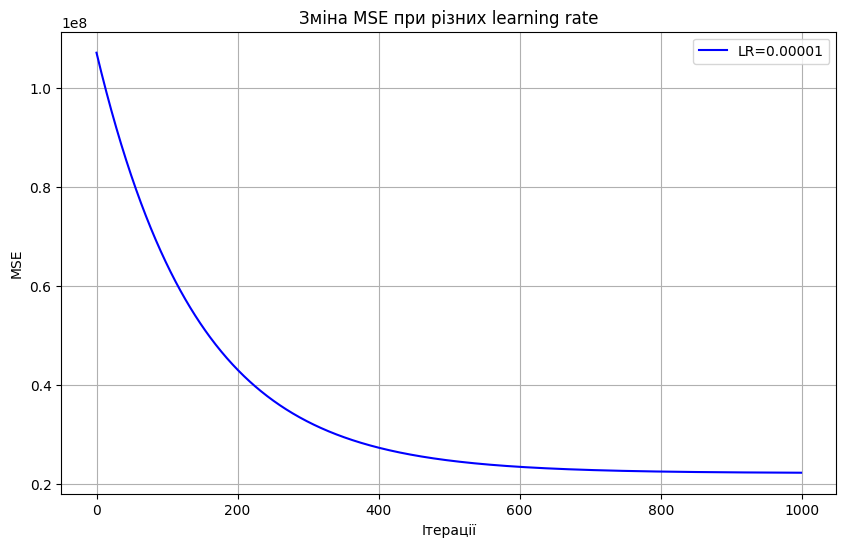

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(errors2, label="LR=0.00001", color="blue")

plt.xlabel("Ітерації")
plt.ylabel("MSE")
plt.title("Зміна MSE при різних learning rate")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
rmse_0001 = np.sqrt(np.mean((y - y_pred_0001) ** 2))
rmse_00001 = np.sqrt(np.mean((y - y_pred_00001) ** 2))
rmse_000001 = np.sqrt(np.mean((y - y_pred_000001) ** 2))

In [36]:
rmse_0001, rmse_00001 , rmse_000001

(np.float64(4713.250582815521),
 np.float64(4715.349750127827),
 np.float64(4723.647721473958))

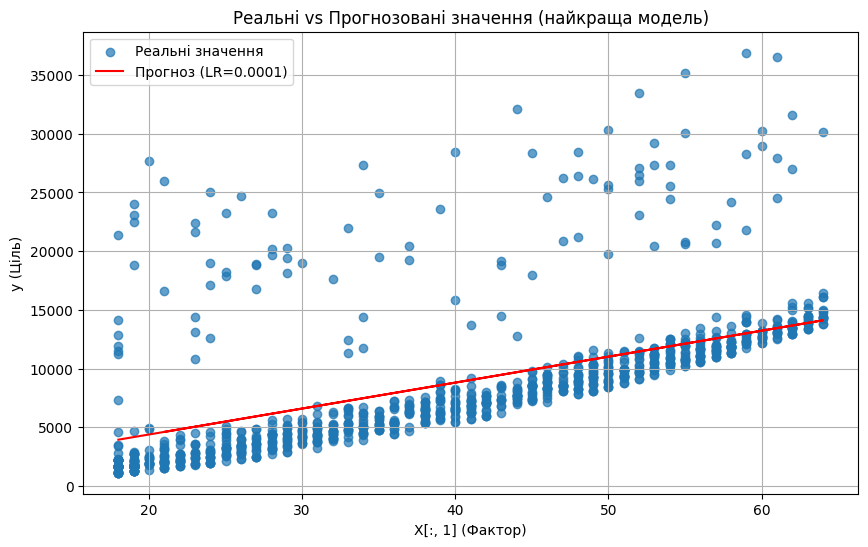

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, label="Реальні значення", alpha=0.7)
plt.plot(X[:, 1], y_pred_0001, color="red", label="Прогноз (LR=0.0001)")

plt.xlabel("X[:, 1] (Фактор)")
plt.ylabel("y (Ціль)")
plt.title("Реальні vs Прогнозовані значення (найкраща модель)")
plt.legend()
plt.grid(True)
plt.show()


**Спостереження**\
Модель, що має learning rate 0.0001 найкраще показує залежніть charge від age, це видно за показниками rmse та mse, вони найнижчі серед трьох моделей з різними learning rate.\
Навчальний learning rate 0.1 є дуже великим і як результат - значення стали занадто великими для коректного обчислення коефіцієнтів та помилок.


**Лінійна регресія scikit-learn**

In [38]:
!pip install scikit-learn --quiet

In [39]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()


In [40]:
X

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [41]:
lin_reg.fit(X, y) # навчаємо модель та отримуємо коеф m та b

LinearRegression()

In [42]:
print(f"Коефіцієнт нахилу (m): {lin_reg.coef_}") # тут буде два коеф m, один 0 , для першого стовпця з одтиниць, а дрегий для реальних значень age
print(f"Перехоплення (b): {lin_reg.intercept_}")


Коефіцієнт нахилу (m): [  0.         267.24891283]
Перехоплення (b): -2091.4205565650827


In [47]:
y_pred_sklearn = lin_reg.predict(X)
y_pred_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [50]:
# Обчислюємо середнє абсолютне відхилення між прогнозами
difference = np.mean(np.abs(y_pred_sklearn - y_pred))
print(f"Середнє абсолютне відхилення між Scikit-Learn і NumPy: {difference:.4f}")


Середнє абсолютне відхилення між Scikit-Learn і NumPy: 0.0000


In [52]:
# Обчислюємо середнє абсолютне відхилення між прогнозами
difference = np.mean(np.abs(y_pred_sklearn - y_pred_0001))
print(f"Середнє абсолютне відхилення між Scikit-Learn і Градієнтним спуском: {difference:.4f}")


Середнє абсолютне відхилення між Scikit-Learn і Градієнтним спуском: 589.7599


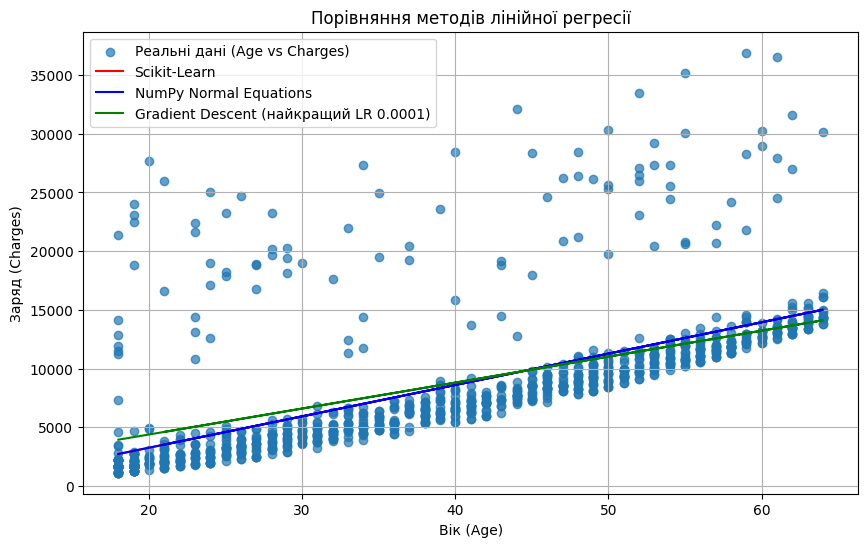

In [54]:
# Діаграма розсіювання (Age vs Charges)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, label="Реальні дані (Age vs Charges)", alpha=0.7)

# Лінійна регресія Scikit-Learn
plt.plot(X[:, 1], y_pred_sklearn, color="red", label="Scikit-Learn")

# Лінійна регресія NumPy (аналітичне розв’язання)
plt.plot(X[:, 1], y_pred, color="blue", label="NumPy Normal Equations")

# Лінійна регресія Градієнтного спуску (з найкращим learning rate)
plt.plot(X[:, 1], y_pred_0001, color="green", label="Gradient Descent (найкращий LR 0.0001)")

plt.xlabel("Вік (Age)")
plt.ylabel("Заряд (Charges)")
plt.title("Порівняння методів лінійної регресії")
plt.legend()
plt.grid(True)
plt.show()


**Висновок**\
Як бачимо на графіку а також за обчисленнями, передбачення лінійної регресії з numpy таке ж як і з scikit-learn.
Найкраще передбачення з градієнтного спуску дещо відрізняється від передбачення лінійної регресії, що може бути спричинене підібраним learning rate


 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [55]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [56]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [57]:
x = np.array(smoker_df["age"])
y = np.array(smoker_df["charges"])

In [62]:
X = np.column_stack((np.ones(len(x)), x))

In [63]:
lin_reg.fit(X, y)

LinearRegression()

In [64]:
print(f"Коефіцієнт нахилу (m): {lin_reg.coef_}") # тут буде два коеф m, один 0 , для першого стовпця з одтиниць, а дрегий для реальних значень age
print(f"Перехоплення (b): {lin_reg.intercept_}")

Коефіцієнт нахилу (m): [  0.         305.23760211]
Перехоплення (b): 20294.12812691597


In [66]:
y_pred_sklearn = lin_reg.predict(X)
y_pred_sklearn[:5]

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865])

In [68]:
SS_res = np.sum((y - y_pred_sklearn) ** 2)
SS_tot = np.sum((y - np.mean(y)) ** 2)
R2 = 1 - (SS_res / SS_tot)

print("R²:", R2)

R²: 0.13558924096084068


In [69]:
rmse = np.sqrt(np.mean((y - y_pred_sklearn) ** 2))

mae = np.mean(np.abs(y - y_pred_sklearn))

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Root Mean Squared Error: 10711.00
Mean Absolute Error: 10097.80


In [70]:
np.mean(y), np.std(y), np.min(y)

(np.float64(32050.23183153284),
 np.float64(11520.46670652943),
 np.float64(12829.4551))

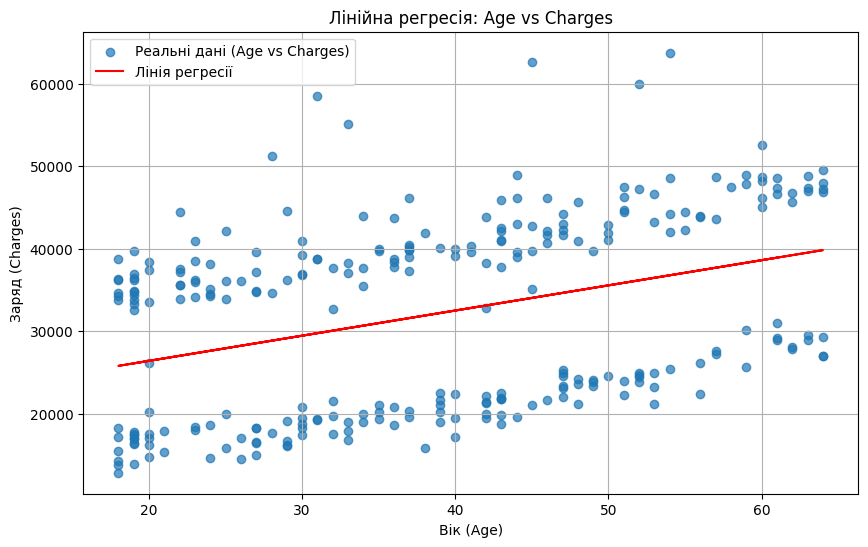

In [71]:
plt.figure(figsize=(10, 6))

# Діаграма розсіювання реальних даних
plt.scatter(X[:, 1], y, label="Реальні дані (Age vs Charges)", alpha=0.7)

# Лінія регресії (модель)
plt.plot(X[:, 1], y_pred_sklearn, color="red", label="Лінія регресії")

plt.xlabel("Вік (Age)")
plt.ylabel("Заряд (Charges)")
plt.title("Лінійна регресія: Age vs Charges")
plt.legend()
plt.grid(True)
plt.show()


In [72]:
rmse_relative = (rmse / np.mean(y)) * 100
mae_relative = (mae / np.mean(y)) * 100

print(f"Відносний RMSE: {rmse_relative:.2f}%")
print(f"Відносний MAE: {mae_relative:.2f}%")


Відносний RMSE: 33.42%
Відносний MAE: 31.51%


**Висновок**\
Це не точна модель, тому що:

1.   R²: 0.13 близький до 0
2.   Відносний RMSE: 33.42%
3.   Відносний MAE: 31.51%

Також на графіку видно, що лише три точки ледать близько до прямої, всі решта даних мають великий розкид, що свідчить про малий звєязок між віком курців та charges. \
Тому, я б не використовувала дану модель для компанії, ця можелт потребує перенавчання або ж вибору інших алгоритмів.

